# Julia
# Zadatak - Kockice
### Odrediti koji je broj na kockici sa slike
---

# Slike kockica

### U ovom primeru će se koristiti samo date slike radi demonstracije. Unapređenje programa bi bilo da se napravi da program radi za drugačije slike kockice, uključujući slike gde kockice nisu skroz paralelne kameri već se vide i tačke sa ostalih strana kockice.

,,,,,

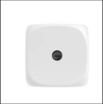
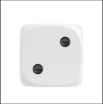
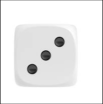
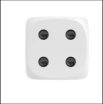
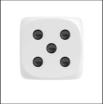
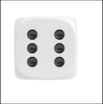

In [1]:
# Ucitavanje slike svih kockica i podela na pojedinacne kockice, kao i pretvaranje u grayscale
using Images
diceIm = load("kockice.jpg")
(h, w) = size(diceIm)
dice = []

for j in 0:1
    for i in 0:2
        push!(dice, Gray.(diceIm[j*h÷2+1:(j+1)*h÷2,i*w÷3+1:(i+1)*w÷3]))
        # za celobrojno deljenje se koristi ÷ (\div <enter>) 
    end
end
hcat.(dice)

# Slike u Juliji

Slike u Juliji, kao i u drugim jezicima, se predstavljaju matricom brojeva (odnosno objekata RGB boje, kod slika u boji).

Kod grayscale slika matrice sadrže brojeve između 0 i 1 gde je 0 crna boja, 1 bela i sve između su nijanse sive.

### Slike se mogu adresirati kao matrice: 
_slika[i, j]_ - daje vrednost _i_ od gornje ivice i _j_ od leve ivice.  

### Može se iseći deo slike korišćenjem opsega(range):

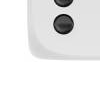

In [2]:
dice[6][100:200, 1:100]

# Resenje 1

## Binarizacija

### Binarizacija ili Thresholding je proces pri kom se grayscale slika pretvara u binarnu (crno belu) sliku gde su svi pikseli ili 0 ili 1. 
### Koji piksel postaje 0 a koji 1 se određuje na osnovu _threshold_ (granica). Svi pikseli veći od _threshold_ postaju 1, a svi manji postaju 0.



In [3]:
function binarize(im, thresh)
    im[im.>thresh] .= 1
    im[im.<=thresh] .= 0
    return im
end;

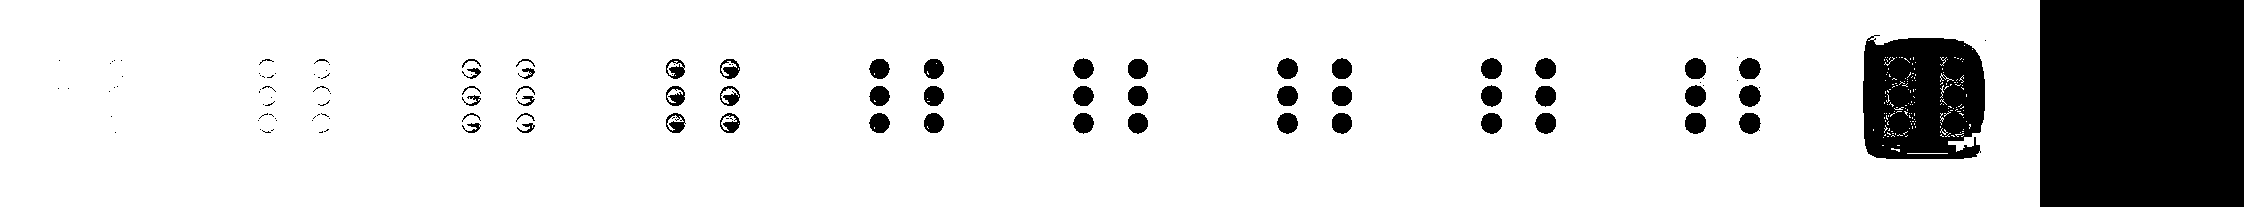

In [4]:
# Prikaz uticaja vrednosti threshold na rezultat binarizacije
thresholds = collect(0:0.1:1)
bins = []

for thr in thresholds
    push!(bins, binarize(copy(dice[6]), thr))
end

reduce(hcat, bins)

#### U krajnjem rešenju bi trebalo da se uspostavi dinamički threshold nekom heuristkom, ali će se u ovom primeru izabrati threshold koji odgovara izabranim slikama

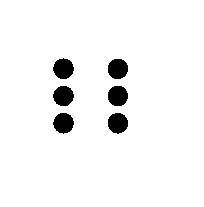

In [5]:
THRESH = 0.5;
NUM = 6

bin = binarize(copy(dice[NUM]), THRESH)

## Detekcija krugova

### Krugovi se detektuju brojanjem grupa povezanih crnih piksela

U rešenju postoje:
- _img_ - matrica brojeva 0 ili 1 veličine $h \times w$ koja predstavlja binarizovanu sliku kockice
- _visited_ - matrica bitova veličine $h \times w$ čiji element $(i, j)$ označava da li je piksel $(i, j)$ na slici već posećen

Kroz sliku se prolazi redom, piksel po piksel. Kada se naiđe na piksel $(i, j)$ koji je crn (vrednost 0), a nije već posećen (što prati matrica _visited_) povećava se brojač _count_ nakon čega se poziva funkcija _fillVisited_ koja prođe kroz sve susedne crne piksele rekurzivno i obeležava ih kao posećene u matrici _visited_ (flood fill algoritam).

Na kraju se u promenljivoj _count_ nalazi broj grupa povezanih crnih piksela što predstavlja sam broj na koji je kockica pala.

In [6]:

# Rekurzivno popunjava bitove u visited matrici svih crnih piksela koji su susedi piksela (i, j) iz slike img
function fillVisited(img, i, j, visited)
    (h, w) = size(img)
    visited[i, j] = 1       # Postavljanje visited bita za ovaj piksel
    for y = -1:1            # Prolazak kroz sve susedne piksele
        for x = -1:1
            if((y == 0 && x == 0) || i+y < 1 || j+x < 1 || i+y>h || j+x > w)    # ako je van slike preskoci 
                continue
            end
            if(img[i+y,j+x] == 0 && !visited[i+y, j+x])     # Susedni crni piksel koji nije vec obradjen    
                fillVisited(img, i+y, j+x, visited);        # Rekurzivni poziv za sused
            end
        end
    end
end;


# Broji grupe povezanih crnih piksela (blobs) u binarnoj slici img
function countBlobs(img)
    (h, w) = size(img)
    visited = BitArray(undef, h, w)     # Matrica posecenosti
    visited .= 0                        # Inicijalizacija na nulu
    count = 0                           # Brojac grupa (blob-ova)

    for i = 1:h
        for j = 1:w
            if img[i,j] == 0 && !visited[i, j]              # Crni piksel koji nije vec obradjen
                count+=1                                    
                fillVisited(img, i, j, visited)       # Postavljanje visited bitova svih povezanih crnih piksela 
            end
        end
    end
    return count
end;


Izabrana kockica:    4
Detektovana kockica: 4


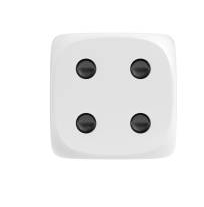

In [7]:
THRESH = 0.5;
NUM = rand(1:6)

bin = binarize(copy(dice[NUM]), THRESH);

n = countBlobs(bin)

println("Izabrana kockica:    ", NUM, "\nDetektovana kockica: ", n);
dice[NUM]

# Resenje 2

## Konvolucija

Konvolucija slike je operacija pri kojoj se nad svakim pikselom izvrši određena obrada. Preko slike se prelazi kernelom (mala matrica brojeva) pri čemu svaki piksel $(i, j)$ dobija novu vrednost koja se određuje zbirom proizvoda vrednosti kernela i odgovarajućih piksela ispod njega.

![slika konvolucije](https://929687.smushcdn.com/2633864/wp-content/uploads/2016/06/convolutions_kernel_sliding.jpg?lossy=1&strip=1&webp=1)

<small>slika preuzeta sa [linka](https://pyimagesearch.com/2016/07/25/convolutions-with-opencv-and-python/)</small>



## Pretprocesiranje

Kao prvi korak se vrsi pretprocesiranje slike kako bi sledeci algoritmi bili efikasniji. 

### Zamućenje slike (Blur)

Slika se zamućuje što ima efekat uklanjanja nepotrebnih detalja i šuma.

Zamućenje se postiže konvolucijom slike Gausovim kernelom, sto je kvadratna matrica čije su vrednosti generisane gausovom raspodelom centriranom u sredini matrice.

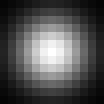

In [8]:
gaus = collect(Kernel.gaussian(3))
Gray.(gaus/maximum(gaus))

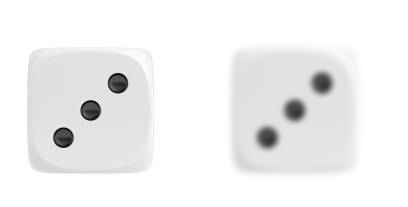

In [9]:
using ImageFiltering
[dice[3] imfilter(dice[3], Kernel.gaussian(3))]


### Detekcija ivica

Sledeći korak pretprocesiranja jeste detekcija ivica. Ovo se postiže Canny detektorom ivica koji je kompleksan algoritam iz vise faza.

Rezultat je binarna slika gde vrednost 1 predstavlja postojanje ivice na tom mestu. Na rezultujućoj slici su ivice najčešće debljine 1 piksel. 

Parametri detektora su _donja_ i _gornja_ granica za to koje će se ivice pojaviti u rezultujućoj slici. Granice se postavljaju na 99% jer se u ovom primeru traže samo najjače ivice koje pripadaju krugovima. 

Treći, opcioni, parametar je $\sigma$ vrednost koja određuje standardnu devijaciju gausovog filtra koji se koristi za zamućenje slike u prvoj fazi algoritma.


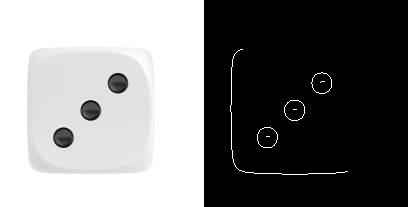

In [10]:
img = copy(dice[3])
[img Gray.(canny(img, (Percentile(99), Percentile(99)), 3))]

### Gradijenti slike

Sledeće je potrebno odrediti gradijente slike. Ovo se postiže konvolucijom sobel kernelima.

Postoji dva Sobel kernela, jedan za x pravac, drugi za y pravac.

$$
\begin{bmatrix}
-0.125 & -0.25 & -0.125 \\
0.0 & 0.0  &  0.0 \\
0.125 & 0.25 &  0.125
\end{bmatrix},\;\;
\begin{bmatrix}
-0.125 & 0.0 & 0.125 \\
-0.25 & 0.0 & 0.25 \\ 
-0.125 & 0.0 & 0.125
\end{bmatrix}
$$

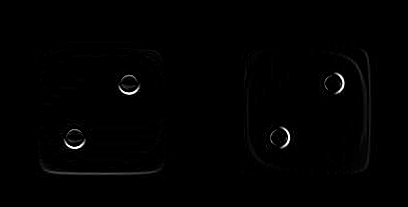

In [14]:
using ImageFeatures
dx = imfilter(img, ImageFeatures.KernelFactors.sobel()[1])
dy = imfilter(img, ImageFeatures.KernelFactors.sobel()[2])
[dx.*4 dy.*4]   # pomnozeno sa 4 da bi se bolje videlo na slici


## Hough transformacija

Nakon pretprocesiranja se moze izvršiti Hough transformacija za konačno detektovanje krugova.

Hough transformacija je algoritam za prepoznavanje geometrijskih oblika u slici. Algoritam pretvara sliku u prostor parametara. Za prepoznavanje krugova u prostoru parametara svaka tačka predstavlja krug nekog oblika. Svaki krug dobija parametre $(x, y, r)$ - položaj kruga $x$,$y$ i poluprecnik kruga $r$. Tada se koristi algoritam za pretraživanje tačaka u prostoru parametara kako bi se izdvojili traženi krugovi.

Kao ulaz funkcija `hough_circle_gradient` prima binarnu sliku ivica dobijenu iz `canny` detektora, fazu gradijenata dobijenih konvolucijom `sobel` kernelima i opseg poluprečnika krugova koje treba detektovati. 

Funkcija vraca niz centara krugova i niz odgovarajućih poluprečnika.

Izabrana kockica:    2
Detektovana kockica: 2

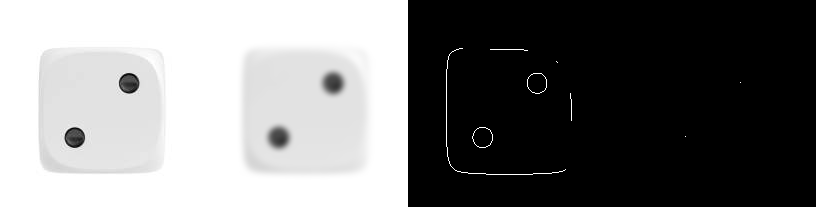

In [13]:
using ImageFeatures, ImageFiltering

NUM = rand(1:6)

img = copy(dice[NUM])                                       # Biranje slike za procesiranje

# ===== Pretprocesiranje =====
imgg = imfilter(img, Kernel.gaussian(3))                    # Blur slike
img_edges = canny(img, (Percentile(99), Percentile(99)), 4) # Canny detektor ivica
dx = imfilter(img, ImageFeatures.KernelFactors.sobel()[1])  # Gradijenti slike - sobel filter
dy = imfilter(img, ImageFeatures.KernelFactors.sobel()[2])

# ===== Hough transformacija =====
img_phase = phase(dx, dy);  # Odredjivanje faze gradijenata sto je potrebno hough funkciji
centers, radii = hough_circle_gradient(img_edges, img_phase, 10:11);

# Slika za prikazivanje detektovanih krugova
img_demo = Float64.(img_edges)      
img_demo .= 0.0;
for c in centers 
    img_demo[c] = 1; 
end

# Konacan broj
n = length(centers)

println("Izabrana kockica:    ", NUM, "\nDetektovana kockica: ", n);

[img imgg Gray.(img_edges) Gray.(img_demo)]

# Literatura

1. [Working with images, Computational thinking, MIT](https://www.youtube.com/watch?v=DGojI9xcCfg&list=PLP8iPy9hna6Q2Kr16aWPOKE0dz9OnsnIJ)
1. [Images dokumentacija](https://juliaimages.org/latest/)
1. [ImageFiltering dokumentacija](https://juliaimages.org/latest/function_reference/#ImageFiltering)
1. [ImageFeatures dokumentacija](https://juliaimages.org/latest/pkgs/features/)
